In [1]:
! pip install transformers

In [2]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer

# Load dataset

In [4]:
fake_data=pd.read_csv("/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv")
real_data=pd.read_csv("/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv")

# Data Analysis

In [5]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


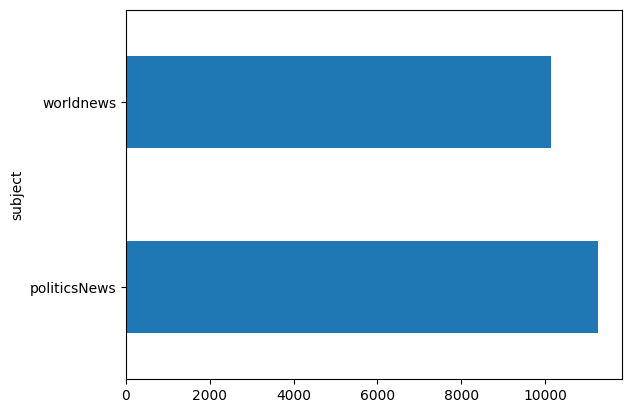

In [7]:
real_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5
    

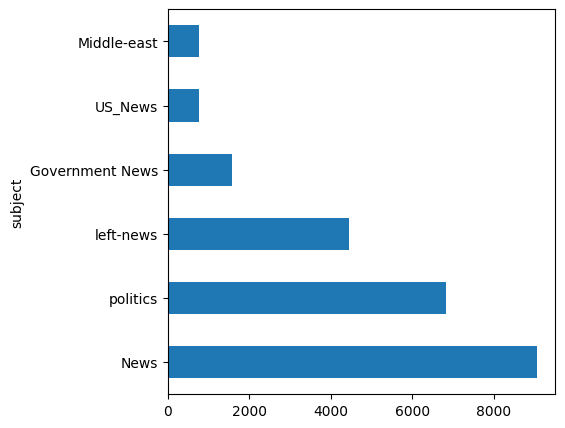

In [8]:
fake_data['subject'].value_counts().plot(kind='barh')
rcParams['figure.figsize'] = 5,5

# wordcloud real text data

In [9]:
wordcld_mask=np.array(Image.open("/kaggle/input/wordcloud-mask-collection/twitter.png"))

In [10]:
wordcld_text=" ".join(real_data["text"].tolist())

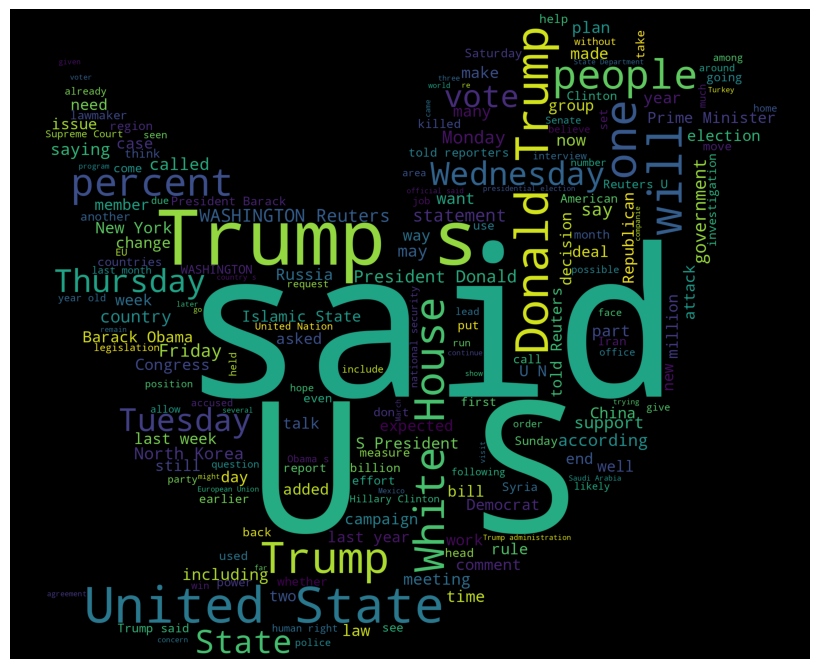

In [11]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(wordcld_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# wordcloud fake text data

In [12]:
fake_text=" ".join(fake_data["text"].tolist())

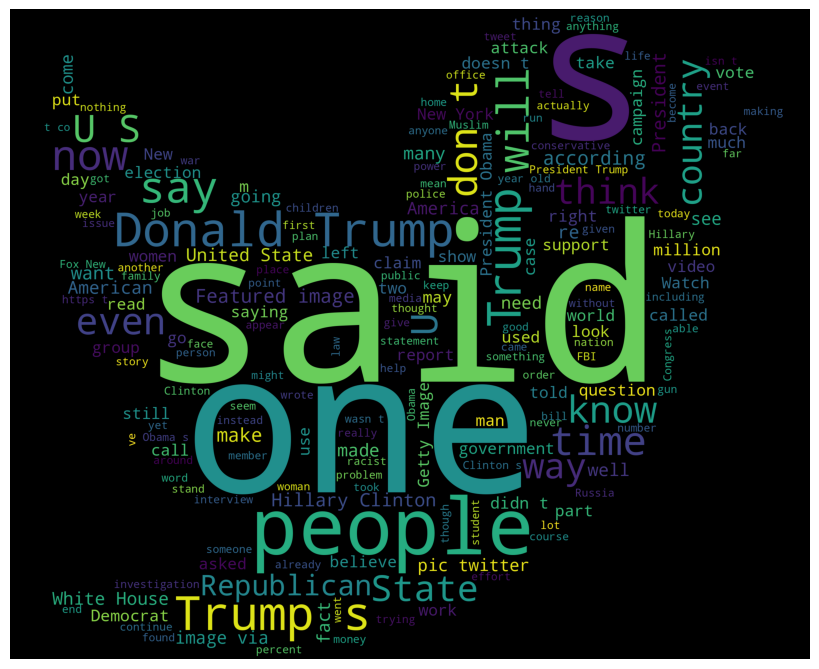

In [13]:
wordcloud=WordCloud(width=1920,height=1080,mask=wordcld_mask).generate(fake_text)
fig=plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [14]:
fake_data["label"]="fake"
real_data["label"]="real"

In [15]:
final_data= pd.concat([fake_data,real_data])

In [16]:
final_data = final_data.sample(frac=1).reset_index(drop=True)

In [17]:
final_data.head(10)

,title,text,subject,date,label
0,FBI Agent Drops FATAL Truth Bomb About What T...,Fox Host Bret Baier found himself forced to re...,News,"November 3, 2016",fake
1,JetBlue offers $99 flights out of Florida ahea...,(Reuters) - JetBlue Airways Corp is offering $...,worldnews,"September 6, 2017",real
2,France's Macron urges IAEA to ensure strict co...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"October 19, 2017",real
3,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,politics,"Jun 1, 2016",fake
4,Kurdish leader Barzani's dream of independence...,"ERBIL, Iraq (Reuters) - Masoud Barzani, who sp...",worldnews,"October 29, 2017",real
5,Bill Kristol: Independent Candidate Will Anno...,As Republicans unite around GOP candidate Dona...,News,"May 30, 2016",fake
6,Christian Fundamentalist A**hole Leaves Waite...,"Garret Wayman, a 17-year-old waiter in Wichita...",News,"January 1, 2016",fake
7,Grizzly Miss-Steppe: How Washington Post Rewro...,MEDIA MELTDOWN: Many now believe that Amazon ...,Middle-east,"January 9, 2017",fake
8,AWESOME! GREG GUTFELD: World hatred of Trump i...,Greg Gutfeld nailed how Americans feel right n...,politics,"Jul 2, 2017",fake
9,“IT’S A WAR!”…Armed Illegal Aliens Are Running...,Farmers and ranchers are being run off their ...,politics,"Mar 12, 2017",fake


In [18]:
final_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [19]:
final_data.drop(["subject","date"], axis=1)

,title,text,label
0,FBI Agent Drops FATAL Truth Bomb About What T...,Fox Host Bret Baier found himself forced to re...,fake
1,JetBlue offers $99 flights out of Florida ahea...,(Reuters) - JetBlue Airways Corp is offering $...,real
2,France's Macron urges IAEA to ensure strict co...,PARIS (Reuters) - French President Emmanuel Ma...,real
3,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,fake
4,Kurdish leader Barzani's dream of independence...,"ERBIL, Iraq (Reuters) - Masoud Barzani, who sp...",real
...,...,...,...
44893,Egypt extends state of emergency for three mon...,CAIRO (Reuters) - Egypt has extended a state o...,real
44894,Trump Threw Mar-A-Lago Fundraiser For Woman A...,Just a few days after she made the decision to...,fake
44895,ARMED BLACK PANTHERS March In Milwaukee: “Free...,,fake
44896,Non-EU Norway appeals for smooth Brexit terms,DUBLIN (Reuters) - Non-EU Norway called on Bru...,real


In [20]:
final_data.head()

,title,text,subject,date,label
0,FBI Agent Drops FATAL Truth Bomb About What T...,Fox Host Bret Baier found himself forced to re...,News,"November 3, 2016",fake
1,JetBlue offers $99 flights out of Florida ahea...,(Reuters) - JetBlue Airways Corp is offering $...,worldnews,"September 6, 2017",real
2,France's Macron urges IAEA to ensure strict co...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"October 19, 2017",real
3,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,politics,"Jun 1, 2016",fake
4,Kurdish leader Barzani's dream of independence...,"ERBIL, Iraq (Reuters) - Masoud Barzani, who sp...",worldnews,"October 29, 2017",real


In [21]:
final_data.label.value_counts()

label
fake    23481
real    21417
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

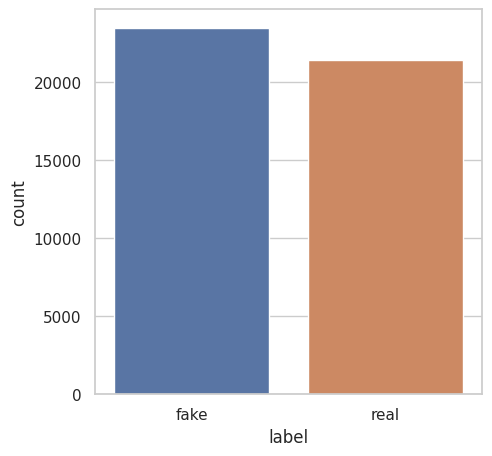

In [22]:
sns.set_theme(style="whitegrid")
sns.countplot(x=final_data["label"])

In [23]:
final_data.head(5)

,title,text,subject,date,label
0,FBI Agent Drops FATAL Truth Bomb About What T...,Fox Host Bret Baier found himself forced to re...,News,"November 3, 2016",fake
1,JetBlue offers $99 flights out of Florida ahea...,(Reuters) - JetBlue Airways Corp is offering $...,worldnews,"September 6, 2017",real
2,France's Macron urges IAEA to ensure strict co...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"October 19, 2017",real
3,MUST WATCH VIDEO: Obama Tries To Trash Trump B...,This is too good to miss! Mr. Teleprompter did...,politics,"Jun 1, 2016",fake
4,Kurdish leader Barzani's dream of independence...,"ERBIL, Iraq (Reuters) - Masoud Barzani, who sp...",worldnews,"October 29, 2017",real


In [24]:
final_data["text"]=final_data["title"]+final_data["text"]

In [25]:
final_data=final_data[["text","label"]]

In [26]:
final_data['label'] = final_data['label'].map({'real':1, 'fake':0})

In [27]:
final_data.sample(5)

,text,label
7631,Senate panel overwhelmingly approves Trump Pen...,1
30388,MUST WATCH! New VIDEO Emerges Of Hillary Leavi...,0
38662,OOPS…CDC EMPLOYEES SICK OF DEALING WITH INFLUX...,0
1857,Trump Attacks Mark Cuban In Bizarre Tweet Tha...,0
42929,Racist Teacher Fired For DISTURBING Viral Fac...,0


In [28]:
final_data.label[9943]

0

In [29]:
final_data.text[36709]

'At least six killed in Iran by quake: TVANKARA (Reuters) - At least six people were killed in an Iranian town on the border with Iraq on Sunday from a powerful earthquake that hit the area, Iranian state television reported. Eight villages were damaged in Iran from the quake, state television reported.  The quake was felt in several Iranian provinces bordering Iraq ... Eight villages were damaged ... Electricity has been cut in some villages and rescue teams have been dispatched to those areas,  TV reported.  State TV said at least six people were killed and many others injured in the town of Qasr-e Shirin.  People were staying out on the streets in towns in the Western Kermanshah province because of the threat from aftershocks, a local Red Crescent official told TV. Many houses in rural parts of the province are made of mud bricks, known to crumble easily in quake-prone Iran. '

In [30]:
max_len=100
data_text=final_data["text"]
data_label=final_data["label"]


In [31]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [32]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [34]:
def tokenize(X):
    
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [35]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [36]:
maxlen=100

# create bert model

In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, Layer
from tensorflow.keras.models import Model

class BertLayer(Layer):
    def __init__(self, bert_model, **kwargs):
        super(BertLayer, self).__init__(**kwargs)
        self.bert = bert_model

    def call(self, inputs):
        return self.bert(inputs)[1]

def create_model(bert_model, maxlen=100):
    input_ids = Input(shape=(maxlen,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(maxlen,), dtype=tf.int32, name="attention_mask")
    
    bert_layer = BertLayer(bert_model)
    pooled_output = bert_layer({'input_ids': input_ids, 'attention_mask': attention_mask})
    x = Dropout(0.3)(pooled_output)
    x = Dense(128, activation="tanh")(x)
    x = Dense(256, activation="tanh")(x)
    x = Dense(512, activation="tanh")(x)
    x = Dense(1024, activation="tanh")(x)
    x = Dropout(0.3)(x)
    x = Dense(2048, activation="tanh")(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation="sigmoid")(x)
    
    model = Model(inputs=[input_ids, attention_mask], outputs=output)
    return model

# Create the model
model = create_model(bert_model)

# Display the model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ attention_mask      │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_ids           │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bert_layer          │ (None, 768)       │          0 │ attention_mask[0… │
│ (BertLayer)         │                   │            │ input_ids[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 768)       │          0 │ bert_layer[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │     98,432 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     33,024 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 512)       │    131,584 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1024)      │    525,312 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1024)      │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 2048)      │  2,099,200 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 2048)      │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │      2,049 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,889,601 (11.02 MB)

 Trainable params: 2,889,601 (11.02 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
optimizer = Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [39]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # or another metric you want to monitor
    patience=3,  # number of epochs with no improvement after which training will be stopped
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,  # Reduce the learning rate by a factor of 0.1
    patience=3,  # Number of epochs with no improvement to wait before reducing the learning rate
    verbose=1,
    min_lr=1e-6  # Minimum learning rate
)

In [40]:
history = model.fit(
    x={
        'input_ids': X_train_token['input_ids'],
        'attention_mask': X_train_token['attention_mask']
    },
    y=Y_train,
    epochs=30,
    batch_size=20,
    validation_data=(
        {
            'input_ids': X_test_token['input_ids'],
            'attention_mask': X_test_token['attention_mask']
        },
        Y_test
    ),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/30


I0000 00:00:1745912124.118499     118 service.cc:145] XLA service 0x7cc238014ae0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745912124.118552     118 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
W0000 00:00:1745912124.734547     118 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


   2/1796 ━━━━━━━━━━━━━━━━━━━━ 2:00 67ms/step - accuracy: 0.5250 - loss: 0.6735   

I0000 00:00:1745912133.308378     118 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1795/1796 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7127 - loss: 0.5420

W0000 00:00:1745912237.291893     117 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


1796/1796 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7127 - loss: 0.5419

W0000 00:00:1745912246.408676     117 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


1796/1796 ━━━━━━━━━━━━━━━━━━━━ 160s 77ms/step - accuracy: 0.7127 - loss: 0.5419 - val_accuracy: 0.9249 - val_loss: 0.1944 - learning_rate: 1.0000e-05
Epoch 2/30
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 128s 71ms/step - accuracy: 0.8611 - loss: 0.3229 - val_accuracy: 0.9391 - val_loss: 0.1586 - learning_rate: 1.0000e-05
Epoch 3/30
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 127s 71ms/step - accuracy: 0.8879 - loss: 0.2681 - val_accuracy: 0.9395 - val_loss: 0.1541 - learning_rate: 1.0000e-05
Epoch 4/30
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 127s 71ms/step - accuracy: 0.8997 - loss: 0.2483 - val_accuracy: 0.9470 - val_loss: 0.1411 - learning_rate: 1.0000e-05
Epoch 5/30
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 127s 71ms/step - accuracy: 0.9024 - loss: 0.2403 - val_accuracy: 0.9470 - val_loss: 0.1381 - learning_rate: 1.0000e-05
Epoch 6/30
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 127s 71ms/step - accuracy: 0.9078 - loss: 0.2305 - val_accuracy: 0.9479 - val_loss: 0.1366 - learning_rate: 1.0000e-05
Epoch 7/30
1796/1796 ━━━━━━━━━━━━━━━━━━━━ 128

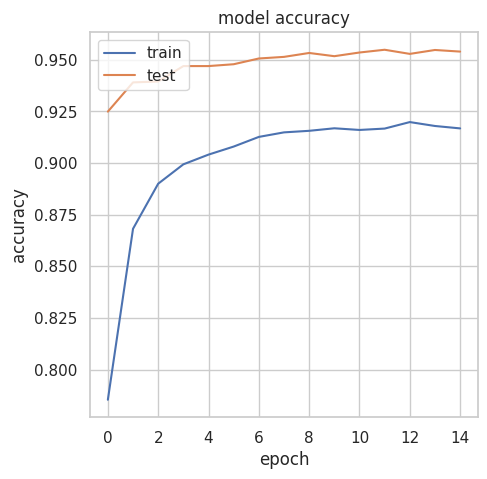

In [41]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

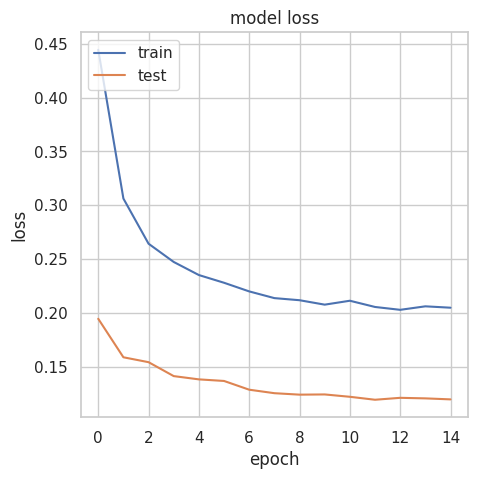

In [42]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [43]:
# Make predictions
y_pred_proba = model.predict({
    'input_ids': X_test_token['input_ids'],
    'attention_mask': X_test_token['attention_mask']
})

# Convert probabilities to binary predictions
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)


W0000 00:00:1745914464.649817     115 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


280/281 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

W0000 00:00:1745914491.906293     116 assert_op.cc:38] Ignoring Assert operator functional_1_1/bert_layer_1/tf_bert_model/bert/embeddings/assert_less/Assert/Assert


281/281 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step


# Confusion matrix

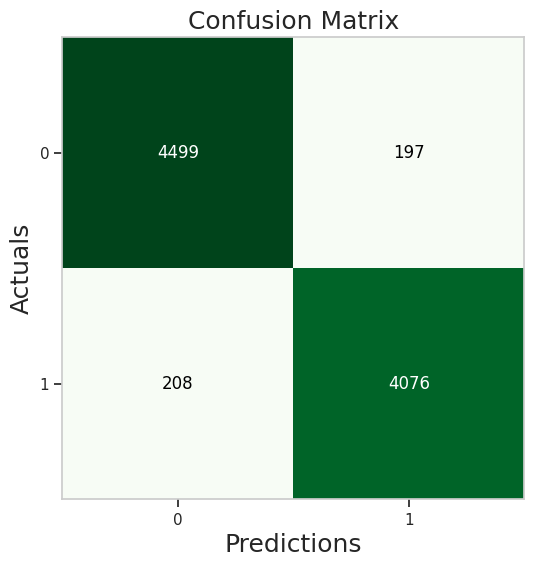

In [44]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [45]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4696
           1       0.95      0.95      0.95      4284

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980



281/281 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step


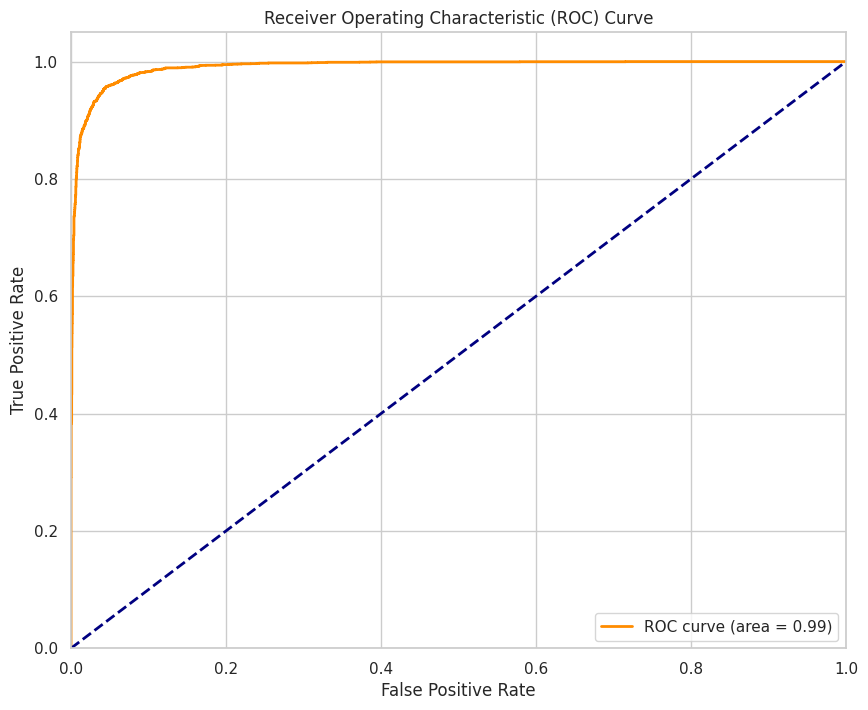

In [46]:
from sklearn.metrics import roc_curve, auc


y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)  # Removed indexing on y_pred_prob
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step


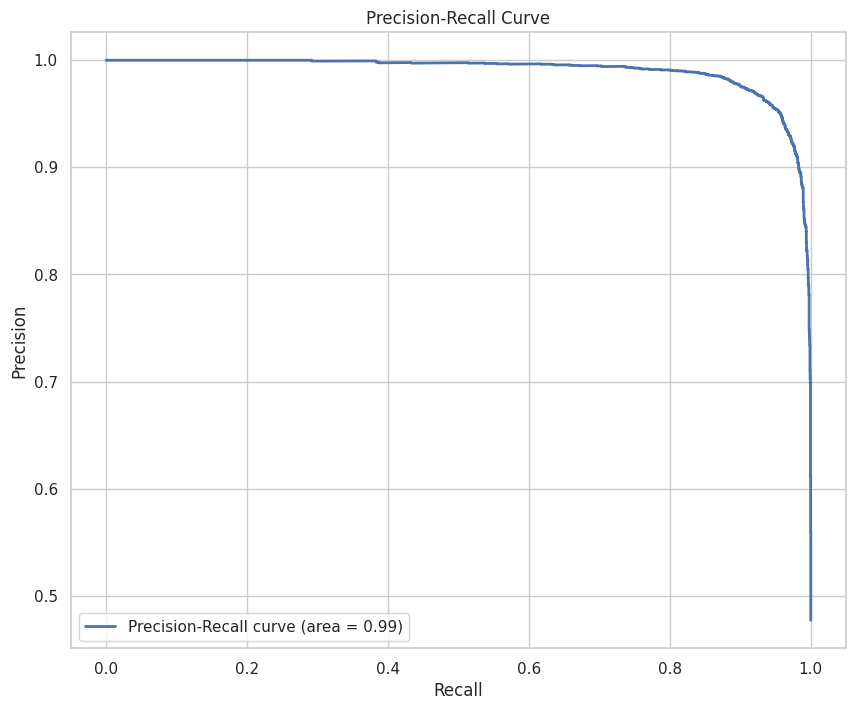

In [47]:
from sklearn.metrics import precision_recall_curve, auc


y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)

precision, recall, thresholds = precision_recall_curve(Y_test, y_pred_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10,8))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step


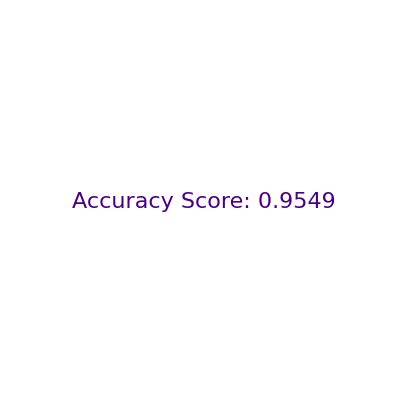

In [48]:
from sklearn.metrics import accuracy_score


y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)
pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(Y_test, pred)

plt.plot([])
plt.text(0, 0, f'Accuracy Score: {accuracy:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


281/281 ━━━━━━━━━━━━━━━━━━━━ 23s 83ms/step


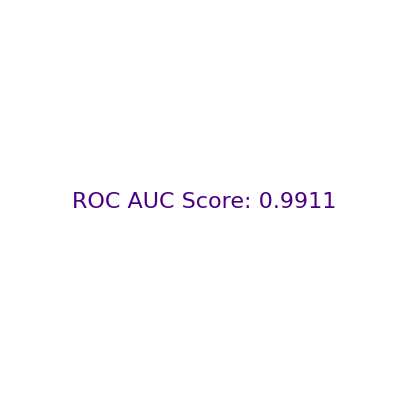

In [49]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = model.predict(
    {
        'input_ids': X_test_token['input_ids'],
        'attention_mask': X_test_token['attention_mask']
    }
)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

plt.plot([])
plt.text(0, 0, f'ROC AUC Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


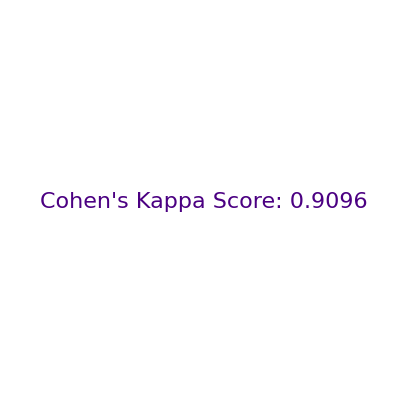

In [50]:
from sklearn.metrics import cohen_kappa_score, matthews_corrcoef, brier_score_loss
import matplotlib.pyplot as plt

# Assuming you have `y_pred_prob` for predicted probabilities and `Y_test` for true labels
pred = (y_pred_prob > 0.5).astype(int)

cohen_kappa = cohen_kappa_score(Y_test, pred)
matthews_corr = matthews_corrcoef(Y_test, pred)
brier_score = brier_score_loss(Y_test, y_pred_prob)

# Plot Cohen's Kappa Score
plt.plot([])
plt.text(0, 0, f'Cohen\'s Kappa Score: {cohen_kappa:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()






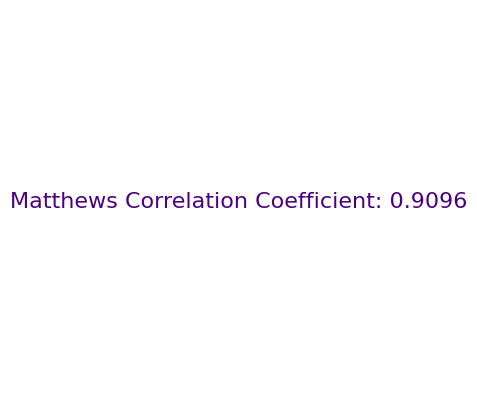

In [51]:
# Plot Matthews Correlation Coefficient
plt.plot([])
plt.text(0, 0, f'Matthews Correlation Coefficient: {matthews_corr:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

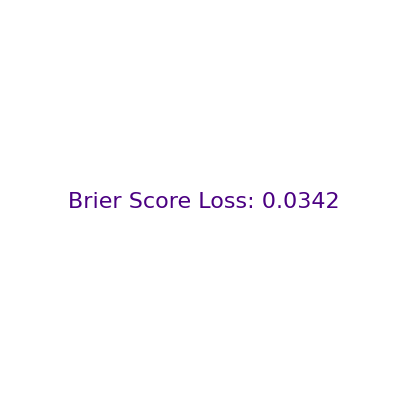

In [52]:
# Plot Brier Score Loss
plt.plot([])
plt.text(0, 0, f'Brier Score Loss: {brier_score:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

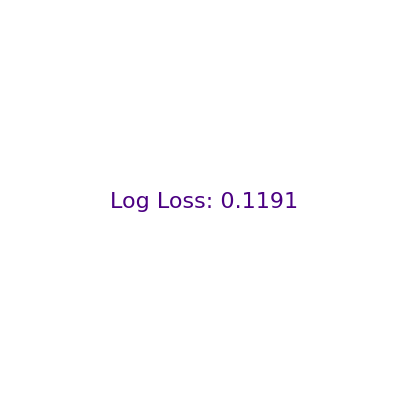

In [53]:
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

log_loss_value = log_loss(Y_test, y_pred_prob)

plt.plot([])
plt.text(0, 0, f'Log Loss: {log_loss_value:.4f}', fontsize=16, ha='center', va='center', color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


# Custom data prediction

In [68]:
test_text="Inida won the India pakistan match"
test_token = tokenize(test_text)
test_text_pred = np.where(model.predict({ 
    'input_ids' : test_token['input_ids'], 
    'attention_mask' : test_token['attention_mask']
}) >= 0., 1, 0)
test_text_pred
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
import pandas as pd
import numpy as np

# Load the trained model
# model = tf.keras.models.load_model('bert_fake_news_model')

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def preprocess_text(text, max_length=512):
    """Preprocess text for BERT model"""
    # Tokenize text
    tokens = tokenizer.encode_plus(
        text,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    return tokens

def predict_news(text):
    """Make prediction on new text"""
    # Preprocess text
    tokens = preprocess_text(text)
    
    # Get model prediction
    prediction = model.predict([tokens['input_ids'], tokens['attention_mask']])
    
    # Convert prediction to label
    label = 'Fake' if prediction[0][0] > 0.5 else 'Real'
    confidence = prediction[0][0] if label == 'Fake' else 1 - prediction[0][0]
    
    return {
        'text': text,
        'prediction': label,
        'confidence': float(confidence)
    }

if __name__ == '__main__':
    # Example usage
    test_text = "India Prime minister Narendra Modi died on 1st jan 2025"
    result = predict_news(test_text)
    print(f"Text: {result['text']}")
    print(f"Prediction: {result['prediction']}")
    print(f"Confidence: {result['confidence']:.2%}") 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Text: India Prime minister Narendra Modi died on 1st jan 2025
Prediction: Fake
Confidence: 68.58%


In [90]:
import pickle
saved=pickle.dumps(model)

NotImplementedError: 
Object BertLayer was created by passing
non-serializable argument values in `__init__()`,
and therefore the object must override `get_config()` in
order to be serializable. Please implement `get_config()`.

Example:

class CustomLayer(keras.layers.Layer):
    def __init__(self, arg1, arg2, **kwargs):
        super().__init__(**kwargs)
        self.arg1 = arg1
        self.arg2 = arg2

    def get_config(self):
        config = super().get_config()
        config.update({
            "arg1": self.arg1,
            "arg2": self.arg2,
        })
        return config